In [126]:
import numpy as np
from scipy.stats import rankdata, ranksums
arr = np.negative(np.load("nn_scores.npy"))

In [127]:
arr

array([[[[1.12028701e-02, 2.20393650e-03, 1.70415234e-03,
          1.59745011e-03, 1.62004145e-03, 1.81398695e-03,
          1.92277408e-03, 1.69138283e-03, 1.30006652e-03,
          2.98525324e-03],
         [2.82237966e-03, 2.45735234e-03, 1.91458125e-03,
          1.79887744e-03, 1.81522652e-03, 2.18528980e-03,
          2.11814897e-03, 1.80139028e-03, 1.44710455e-03,
          3.41139384e-03]],

        [[2.55278752e-03, 2.20193994e-03, 1.70539526e-03,
          1.59783800e-03, 1.62338348e-03, 1.80508171e-03,
          1.92937609e-03, 1.69561713e-03, 1.29125195e-03,
          2.95592357e-03],
         [2.79144245e-03, 2.45766399e-03, 1.79489044e-03,
          2.04964153e-03, 1.78602841e-03, 2.24235862e-03,
          2.09951239e-03, 1.75212863e-03, 1.50079575e-03,
          3.37264150e-03]],

        [[2.57479557e-03, 2.20367517e-03, 1.70540867e-03,
          1.59795889e-03, 1.62042758e-03, 1.81123139e-03,
          1.92114733e-03, 1.68876162e-03, 1.31803321e-03,
          2.951154

In [128]:
mean_scores = np.mean(arr, axis=3)

In [129]:
mean_scores.shape

(3, 15, 2)

In [130]:
mean_scores

array([[[2.80419141e-03, 2.17717446e-03],
        [1.93585946e-03, 2.18471037e-03],
        [1.93925935e-03, 2.19660822e-03],
        [1.94969461e-03, 2.21607230e-03],
        [1.84209422e-03, 2.13677121e-03],
        [1.65461207e-03, 1.56953767e-03],
        [1.77057794e-03, 1.35913964e-03],
        [1.07955732e-03, 1.64995217e-03],
        [1.18957378e-03, 1.29648467e-03],
        [1.06648938e-03, 1.42105273e-03],
        [1.61726820e-03, 1.58200836e-03],
        [1.79520213e-03, 3.48966944e-03],
        [3.81049065e-03, 9.21392155e-03],
        [6.05311509e-03, 4.49327061e-02],
        [9.43643750e-03, 2.96086821e-01]],

       [[1.93746597e-03, 1.01923524e-02],
        [1.78158916e+00, 2.17564485e-03],
        [2.16249337e-02, 3.58445051e-01],
        [2.98702255e+00, 3.13411856e-02],
        [8.31135554e-02, 8.94833367e-02],
        [1.87868729e+00, 1.39706294e-01],
        [1.55227858e-02, 1.87784065e-01],
        [6.79462587e-02, 4.92095277e-01],
        [2.49582437e-02, 1.05810

In [131]:
hidden_activations = ['sigmoid', 'relu', 'tanh']
hidden_layer_neurons = [1, 2, 5, 10, 15, 20, 25, 50, 100, 200, 500, 1000, 2500, 5000, 10000]
loss_functions = ['mean_squared_error', 'mean_absolute_error']

In [132]:
mean_scores_for_errors = [[], []]
squared_error_better = 0
for i, hidden_activation in enumerate(hidden_activations):
    for j, hid_layer_neurons in enumerate(hidden_layer_neurons):
        for k, loss in enumerate(loss_functions):
            mean_scores_for_errors[k%2].append(mean_scores[i,j,k])
            print("NN, activation={0}, neurons={1}, loss={2}".format(hidden_activation, hid_layer_neurons, loss), mean_scores[i,j,k])
        squared_error_better += 1 if mean_scores[i,j,0] < mean_scores[i,j,1] else 0

NN, activation=sigmoid, neurons=1, loss=mean_squared_error 0.0028041914097589804
NN, activation=sigmoid, neurons=1, loss=mean_absolute_error 0.002177174463779822
NN, activation=sigmoid, neurons=2, loss=mean_squared_error 0.001935859464787242
NN, activation=sigmoid, neurons=2, loss=mean_absolute_error 0.0021847103709648464
NN, activation=sigmoid, neurons=5, loss=mean_squared_error 0.0019392593475915023
NN, activation=sigmoid, neurons=5, loss=mean_absolute_error 0.0021966082152935964
NN, activation=sigmoid, neurons=10, loss=mean_squared_error 0.0019496946134817145
NN, activation=sigmoid, neurons=10, loss=mean_absolute_error 0.002216072297718308
NN, activation=sigmoid, neurons=15, loss=mean_squared_error 0.0018420942207850867
NN, activation=sigmoid, neurons=15, loss=mean_absolute_error 0.0021367712080499887
NN, activation=sigmoid, neurons=20, loss=mean_squared_error 0.0016546120728640624
NN, activation=sigmoid, neurons=20, loss=mean_absolute_error 0.0015695376675484453
NN, activation=sigm

In [133]:
np.mean(mean_scores_for_errors, axis=1)

array([0.29771519, 0.49304785])

In [134]:
mean_errors.shape

(3, 15)

In [135]:
squared_error_better

35

In [137]:
mean_scores_without_absolute_error = np.mean(mean_scores[:,:,:1], axis=2)

In [138]:
mean_scores_without_absolute_error

array([[2.80419141e-03, 1.93585946e-03, 1.93925935e-03, 1.94969461e-03,
        1.84209422e-03, 1.65461207e-03, 1.77057794e-03, 1.07955732e-03,
        1.18957378e-03, 1.06648938e-03, 1.61726820e-03, 1.79520213e-03,
        3.81049065e-03, 6.05311509e-03, 9.43643750e-03],
       [1.93746597e-03, 1.78158916e+00, 2.16249337e-02, 2.98702255e+00,
        8.31135554e-02, 1.87868729e+00, 1.55227858e-02, 6.79462587e-02,
        2.49582437e-02, 1.43299334e-02, 1.03011531e-01, 4.51083807e+00,
        1.64479826e+00, 2.91781981e-02, 6.39591853e-02],
       [3.03173731e-02, 1.71433014e-02, 1.93433787e-03, 1.81716282e-03,
        1.99309447e-03, 1.94491870e-03, 1.87992432e-03, 1.67491145e-03,
        1.25602149e-03, 1.68349886e-03, 2.13758115e-03, 1.49185303e-03,
        2.50560995e-03, 2.47246765e-02, 3.62172749e-02]])

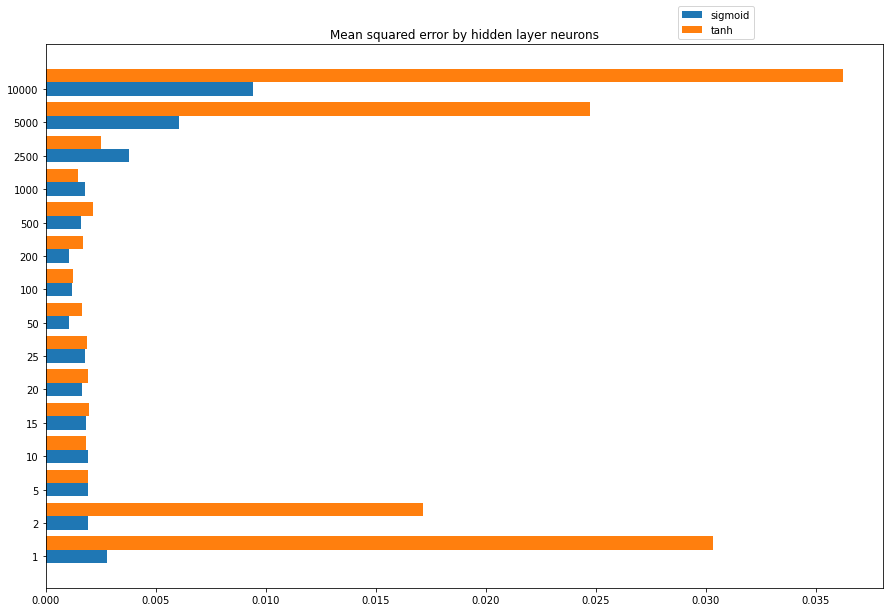

In [140]:
plt.rcParams["figure.figsize"]=15,10
scores = np.delete(mean_scores_without_absolute_error, 1, axis=0)
y_pos = np.arange(len(scores))
height = 0.8 / len(scores)
Pos = np.arange(len(scores[0]))
for i in range(len(scores)):
    plt.barh(Pos + i * height, scores[i], height=height)
plt.yticks(Pos, hidden_layer_neurons)
plt.legend(["sigmoid", "tanh"], bbox_to_anchor=(0.75, 1.00), loc='lower left')
plt.title("Mean squared error by hidden layer neurons")
plt.show()

In [93]:
scores = np.delete(scores, 1, axis=0)

In [94]:
scores

array([[0.00280419, 0.00193586, 0.00193926, 0.00194969, 0.00184209,
        0.00165461, 0.00177058, 0.00107956, 0.00118957, 0.00106649,
        0.00161727, 0.0017952 , 0.00381049, 0.00605312, 0.00943644]])

In [ ]:
scores = np.delete(mean_scores_without, 1, axis=0)
y_pos = np.arange(len(scores))
height = 0.8 / len(scores)
Pos = np.arange(len(scores[0]))
for i in range(len(scores)):
    plt.barh(Pos + i * height, scores[i], height=height)
plt.yticks(Pos, hidden_layer_neurons)
plt.legend(["sigmoid", "tanh"], bbox_to_anchor=(0.75, 1.00), loc='lower left')
plt.title("Mean squared error")
plt.show()

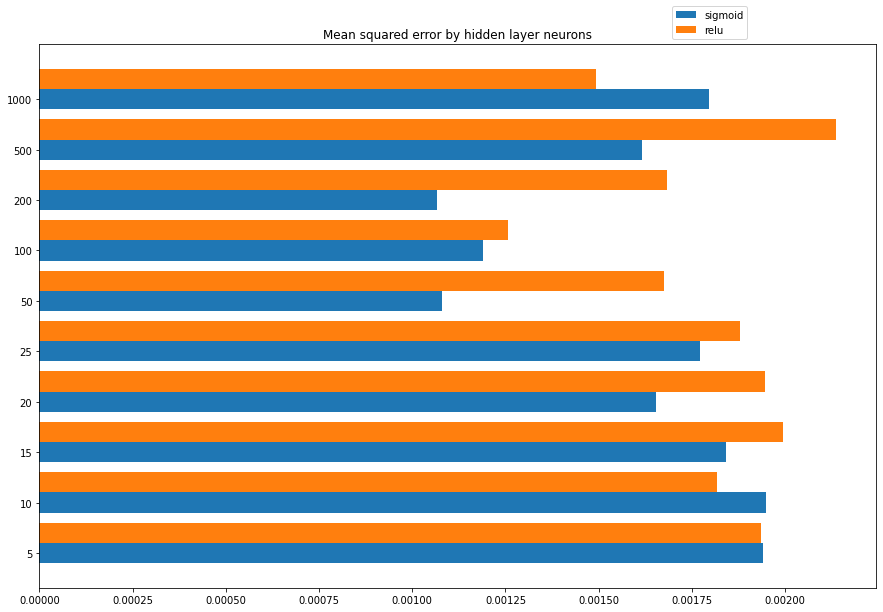

In [112]:
scores = np.delete(mean_scores_without, 1, axis=0)[:, 2:-3]
y_pos = np.arange(len(scores))
height = 0.8 / len(scores)
Pos = np.arange(len(scores[0]))
for i in range(len(scores)):
    plt.barh(Pos + i * height, scores[i], height=height)
plt.yticks(Pos, hidden_layer_neurons[2:-3])
plt.legend(["sigmoid", "relu", "tanh"], bbox_to_anchor=(0.75, 1.00), loc='lower left')
plt.title("Mean squared error by hidden layer neurons")
plt.show()

In [113]:
scores

array([[0.00193926, 0.00194969, 0.00184209, 0.00165461, 0.00177058,
        0.00107956, 0.00118957, 0.00106649, 0.00161727, 0.0017952 ],
       [0.00193434, 0.00181716, 0.00199309, 0.00194492, 0.00187992,
        0.00167491, 0.00125602, 0.0016835 , 0.00213758, 0.00149185]])

In [114]:
mean_scores_without

array([[2.80419141e-03, 1.93585946e-03, 1.93925935e-03, 1.94969461e-03,
        1.84209422e-03, 1.65461207e-03, 1.77057794e-03, 1.07955732e-03,
        1.18957378e-03, 1.06648938e-03, 1.61726820e-03, 1.79520213e-03,
        3.81049065e-03, 6.05311509e-03, 9.43643750e-03],
       [1.93746597e-03, 1.78158916e+00, 2.16249337e-02, 2.98702255e+00,
        8.31135554e-02, 1.87868729e+00, 1.55227858e-02, 6.79462587e-02,
        2.49582437e-02, 1.43299334e-02, 1.03011531e-01, 4.51083807e+00,
        1.64479826e+00, 2.91781981e-02, 6.39591853e-02],
       [3.03173731e-02, 1.71433014e-02, 1.93433787e-03, 1.81716282e-03,
        1.99309447e-03, 1.94491870e-03, 1.87992432e-03, 1.67491145e-03,
        1.25602149e-03, 1.68349886e-03, 2.13758115e-03, 1.49185303e-03,
        2.50560995e-03, 2.47246765e-02, 3.62172749e-02]])

In [119]:
scoresT = -1*mean_scores_without.T
ranks = []
for ms in scoresT:
    ranks.append(rankdata(ms).tolist())
ranks = np.array(ranks)

In [120]:
ranks

array([[2., 3., 1.],
       [3., 1., 2.],
       [2., 1., 3.],
       [2., 1., 3.],
       [3., 1., 2.],
       [3., 1., 2.],
       [3., 1., 2.],
       [3., 1., 2.],
       [3., 1., 2.],
       [3., 1., 2.],
       [3., 1., 2.],
       [2., 1., 3.],
       [2., 1., 3.],
       [3., 1., 2.],
       [3., 1., 2.]])

In [121]:
np.mean(ranks, axis=0)

array([2.66666667, 1.13333333, 2.2       ])

In [124]:
from tabulate import tabulate
def perform_wilcoxon_test(scores, headers, alfa=.05):
    print(scores)

    scores = scores.T

    ranks = []
    for ms in scores:
        ranks.append(rankdata(ms).tolist())
    ranks = np.array(ranks)
    print("\nRanks:\n", ranks)

    clfs_number = len(scores[0])
    w_statistic = np.zeros((clfs_number, clfs_number))
    p_value = np.zeros((clfs_number, clfs_number))

    for i in range(clfs_number):
        for j in range(clfs_number):
            w_statistic[i, j], p_value[i, j] = ranksums(ranks.T[i], ranks.T[j])

    names_column = np.array([[header] for header in headers])
    w_statistic_table = np.concatenate((names_column, w_statistic), axis=1)
    w_statistic_table = tabulate(w_statistic_table, headers, floatfmt=".2f")
    p_value_table = np.concatenate((names_column, p_value), axis=1)
    p_value_table = tabulate(p_value_table, headers, floatfmt=".2f")
    print("w-statistic:\n", w_statistic_table, "\n\np-value:\n", p_value_table)

    advantage = np.zeros((clfs_number, clfs_number))
    advantage[w_statistic > 0] = 1
    advantage_table = tabulate(np.concatenate(
        (names_column, advantage), axis=1), headers)
    print("Advantage:\n", advantage_table)

    significance = np.zeros((clfs_number, clfs_number))
    significance[p_value <= alfa] = 1
    significance_table = tabulate(np.concatenate(
        (names_column, significance), axis=1), headers)
    print("Statistical significance (alpha = ", alfa, "):\n", significance_table)

    stat_better = significance * advantage
    stat_better_table = tabulate(np.concatenate(
        (names_column, stat_better), axis=1), headers)
    print("Statistically significantly better:\n", stat_better_table)

In [125]:
perform_wilcoxon_test(-1*mean_scores_without, ["sigmoid", "ReLU", "tanh"])

[[-2.80419141e-03 -1.93585946e-03 -1.93925935e-03 -1.94969461e-03
  -1.84209422e-03 -1.65461207e-03 -1.77057794e-03 -1.07955732e-03
  -1.18957378e-03 -1.06648938e-03 -1.61726820e-03 -1.79520213e-03
  -3.81049065e-03 -6.05311509e-03 -9.43643750e-03]
 [-1.93746597e-03 -1.78158916e+00 -2.16249337e-02 -2.98702255e+00
  -8.31135554e-02 -1.87868729e+00 -1.55227858e-02 -6.79462587e-02
  -2.49582437e-02 -1.43299334e-02 -1.03011531e-01 -4.51083807e+00
  -1.64479826e+00 -2.91781981e-02 -6.39591853e-02]
 [-3.03173731e-02 -1.71433014e-02 -1.93433787e-03 -1.81716282e-03
  -1.99309447e-03 -1.94491870e-03 -1.87992432e-03 -1.67491145e-03
  -1.25602149e-03 -1.68349886e-03 -2.13758115e-03 -1.49185303e-03
  -2.50560995e-03 -2.47246765e-02 -3.62172749e-02]]

Ranks:
 [[2. 3. 1.]
 [3. 1. 2.]
 [2. 1. 3.]
 [2. 1. 3.]
 [3. 1. 2.]
 [3. 1. 2.]
 [3. 1. 2.]
 [3. 1. 2.]
 [3. 1. 2.]
 [3. 1. 2.]
 [3. 1. 2.]
 [2. 1. 3.]
 [2. 1. 3.]
 [3. 1. 2.]
 [3. 1. 2.]]
w-statistic:
            sigmoid    ReLU    tanh
-------  ----